## Job Description Analysis


### Project Overview
The aim of this project is to analyze job-related data, including job qualifications, experience, location, salary range, work type, company size, and other relevant factors. The goal is to gain insights into job market trends and predict outcomes such as salary expectations, job classifications, and possible fraudulent job postings.

 
### About the Dataset
The dataset s cllected from [kaggle](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset) and it consists of 1,619,540 rows and 23 columns, containing diverse job postings from various industries across multiple countries. It includes information such as job title, experience, qualifications, salary range, location, work type, and company details.

The dataset helps in understanding job market trends, predicting salary ranges, classifying job roles, and even detecting anomalies in job postings.

### Job Dictionary

| Column Name          | Description |
|----------------------|-------------|
| Job Id              | Unique identifier for the job posting |
| Experience          | Required years of experience for the job |
| Qualifications      | Educational or professional qualifications needed |
| Salary Range        | Expected salary range for the job |
| location           | Job location (city, state, or region) |
| Country            | Country where the job is based |
| latitude           | Latitude coordinate of the job location |
| longitude          | Longitude coordinate of the job location |
| Work Type          | Employment type (Full-time, Part-time, Contract, etc.) |
| Company Size       | Size of the company (Small, Medium, Large) |
| Job Posting Date   | Date when the job was posted |
| Preference         | Preferred qualifications or skills |
| Contact Person     | Name of the person handling the recruitment |
| Contact            | Contact details for job inquiries |
| Job Title          | Title of the job position |
| Role              | Specific role or responsibilities of the position |
| Job Portal        | Online platform where the job is posted |
| Job Description   | Detailed description of the job responsibilities |
| Benefits          | Perks and benefits offered for the job |
| skills            | Required skills for the job |
| Responsibilities  | Key responsibilities of the position |
| Company          | Name of the hiring company |
| Company Profile  | Brief description of the company |


### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Loading the Dataset

In [2]:
df = pd.read_csv('job_descriptions.csv')
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'JobDate', 'Preference', 'Contact Person', 'Contact', 'Job Title',
       'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


### Data Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1048575 non-null  float64
 1   Experience        1048575 non-null  object 
 2   Qualifications    1048575 non-null  object 
 3   Salary Range      1048575 non-null  object 
 4   location          1048575 non-null  object 
 5   Country           1048575 non-null  object 
 6   latitude          1048575 non-null  float64
 7   longitude         1048575 non-null  float64
 8   Work Type         1048575 non-null  object 
 9   Company Size      1048575 non-null  int64  
 10  JobDate           1048575 non-null  object 
 11  Preference        1048575 non-null  object 
 12  Contact Person    1048575 non-null  object 
 13  Contact           1048575 non-null  object 
 14  Job Title         1048575 non-null  object 
 15  Role              1048575 non-null  object 
 16  

In [4]:
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.549784e+15,1.937667e+01,1.642460e+01,7.370591e+04
std,8.948046e+14,2.354377e+01,7.063506e+01,3.530437e+04
min,1.817950e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.746125e+14,5.152100e+00,-1.518040e+01,4.312100e+04
50%,1.549470e+15,1.804250e+01,1.914510e+01,7.364100e+04
75%,2.325065e+15,3.907420e+01,4.757690e+01,1.043175e+05
max,3.099620e+15,7.170690e+01,1.780650e+02,1.348340e+05


In [5]:
df.shape

(1048575, 23)

### Extracting Year From Job Posting

In [6]:
df['Job Posting Year'] = df['JobDate'].astype(str).str.extract(r'(\d{4})')

In [7]:
df.sample()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Job Posting Year
722553,1.743380e+15,2 to 12 Years,BBA,$61K-$98K,Bangui,Central African Republic,6.6111,20.9394,Intern,85584,...,Systems Administrator,Database Administrator,USAJOBS,"Database Administrators manage databases, ensu...","{'Tuition Reimbursement, Stock Options or Equi...","Database management systems (e.g., MySQL, Orac...","Administer and optimize databases, ensuring da...",Western Union Company,"{""Sector"":""Financial Services/Remittances"",""In...",2023


### Removing Id column and Providing new Id's



In [8]:
df = df.drop(columns=['Job Id'])

In [9]:
# Generate unique Job Ids
df['Job Id'] = np.random.choice(range(100000, 2000000), size=len(df), replace=False)

In [10]:
df.sample()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,JobDate,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Job Posting Year,Job Id
849213,1 to 12 Years,MCA,$63K-$111K,Baku,Azerbaijan,40.1431,47.5769,Contract,35005,21-12-2022,...,Network Administrator,Stack Overflow Jobs,Network Administrators manage an organizations...,"{'Tuition Reimbursement, Stock Options or Equi...",Network management Troubleshooting Network sec...,"Manage and maintain computer networks, trouble...",Airtel Africa,"{""Sector"":""Telecommunications"",""Industry"":""Tel...",2022,1920238


In [11]:
# using set_index to job id 
df.set_index('Job Id', inplace=True)

In [12]:
df.head()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,JobDate,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Job Posting Year
Job Id,,,,,,,,,,,,,,,,,,,,,
1397781,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,24-04-2022,...,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",2022
1838179,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,19-12-2022,...,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2022
1376362,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,14-09-2022,...,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",2022
373737,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,25-02-2023,...,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",2023
1722112,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,11-10-2022,...,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",2022


### Counting no of outpliers in the Dataset

In [13]:
# Count the total number of outliers in the dataset using IQR
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum()
    return outliers

total_outliers = count_outliers(df.select_dtypes(include=['number']))
print(f"Total number of outliers in the dataset: {total_outliers}")

Total number of outliers in the dataset: 82226


### Handling Company Profile

In [14]:
df['Company Profile'] = df['Company Profile'].fillna("{}")
df['Company Profile'] = df['Company Profile'].apply(lambda x: x.replace('"Duke"', "'Duke'") if isinstance(x, str) else x)
df['Company Profile'] = df['Company Profile'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['Company Sector'] = df['Company Profile'].apply(lambda x: x.get('Sector', ''))
df['Industry'] = df['Company Profile'].apply(lambda x: x.get('Industry', ''))
df['City'] = df['Company Profile'].apply(lambda x: x.get('City', ''))
df['State'] = df['Company Profile'].apply(lambda x: x.get('State', ''))
df['CEO'] = df['Company Profile'].apply(lambda x: x.get('CEO', ''))

df.drop(columns=['Company Profile'], inplace=True)

In [15]:
df.sample()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,JobDate,...,Benefits,skills,Responsibilities,Company,Job Posting Year,Company Sector,Industry,City,State,CEO
Job Id,,,,,,,,,,,,,,,,,,,,,
518957,0 to 15 Years,BA,$58K-$83K,Nuku?alofa,Tonga,-21.1789,-175.1982,Temporary,43238,12-04-2022,...,"{'Life and Disability Insurance, Stock Options...",Brand strategy Brand development Creative dire...,"Manage and strengthen brand identity, ensuring...",Arthur J. Gallagher,2022,Insurance,Diversified Financials,Rolling Meadows,Illinois,Patrick Gallagher


### Dropping Un-necessary Columns

In [16]:
unnecessary_cols = ['Contact Person', 'Contact', 'Ticker', 'latitude', 'longitude', 'JobDate', 'Benefits', 'Zip', 'Website', 'CEO']
df = df.drop(columns=unnecessary_cols, errors='ignore')

## Visualization

### Count job postings per year


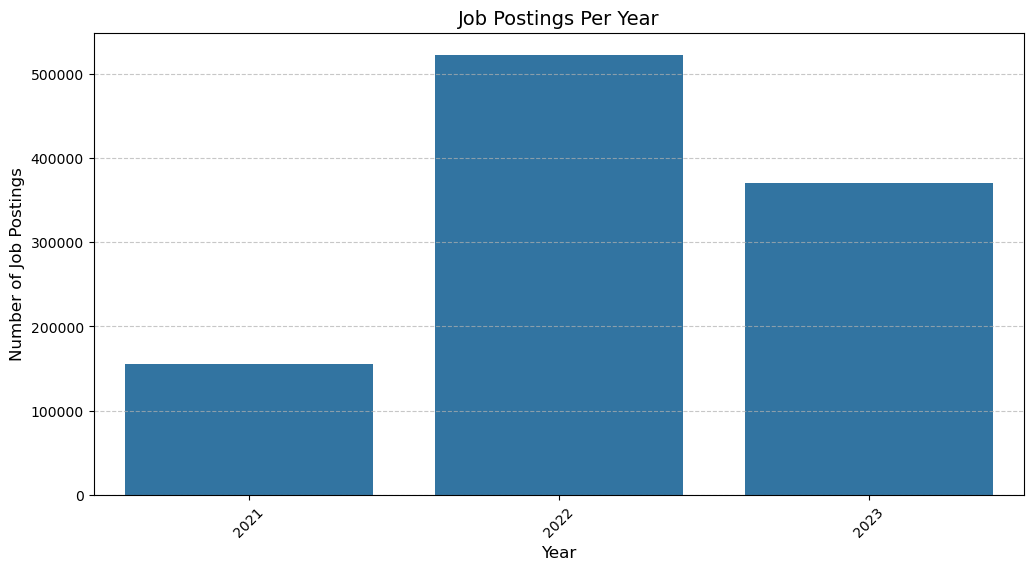

In [17]:
yearly_counts = df['Job Posting Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values )
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.title("Job Postings Per Year", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Stacked Bar chart

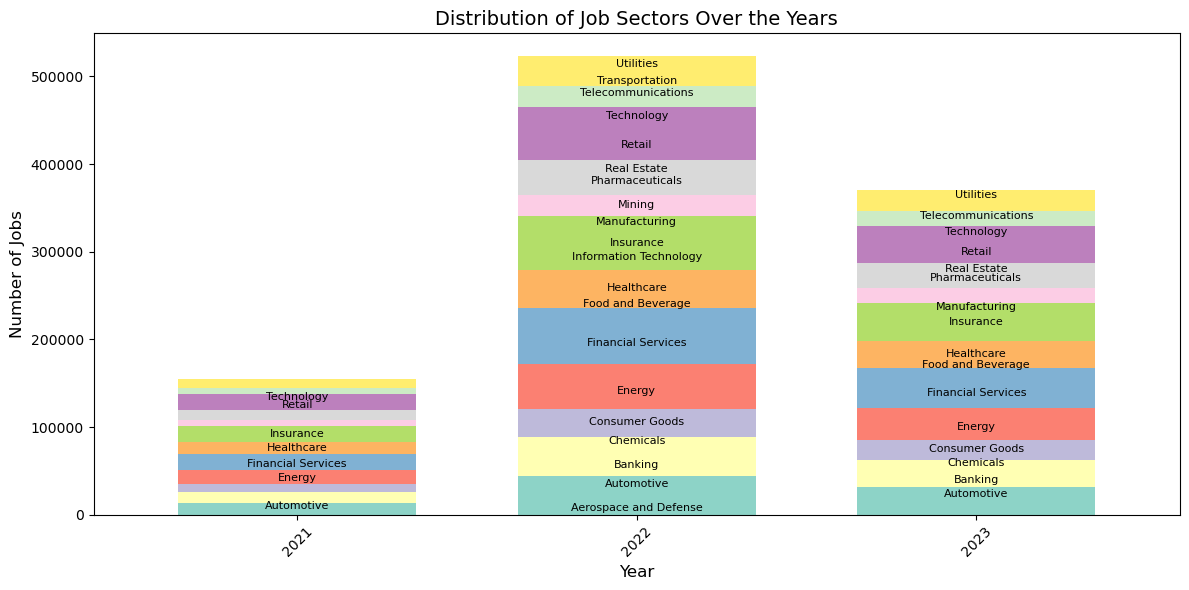

In [18]:
# making a stacked bar chart to view the job posting of company sector in each year given
sector_counts = df.groupby(["Job Posting Year", "Company Sector"]).size().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
sector_counts.plot(kind="bar", stacked=True, colormap="Set3", ax=ax, width=0.7)
for i, year in enumerate(sector_counts.index):
    bottom = 0
    for sector in sector_counts.columns:
        count = sector_counts.loc[year, sector]
        if count > sector_counts.sum().max() * 0.05:  # Only label large sections
            ax.text(i, bottom + count / 2, sector, ha="center", va="center", fontsize=8, rotation=0)
        bottom += count
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.title("Distribution of Job Sectors Over the Years", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend([],[], frameon=False)
plt.tight_layout()

plt.show()

### Grouped bar chart for the top 40 Job Title based on preferences.

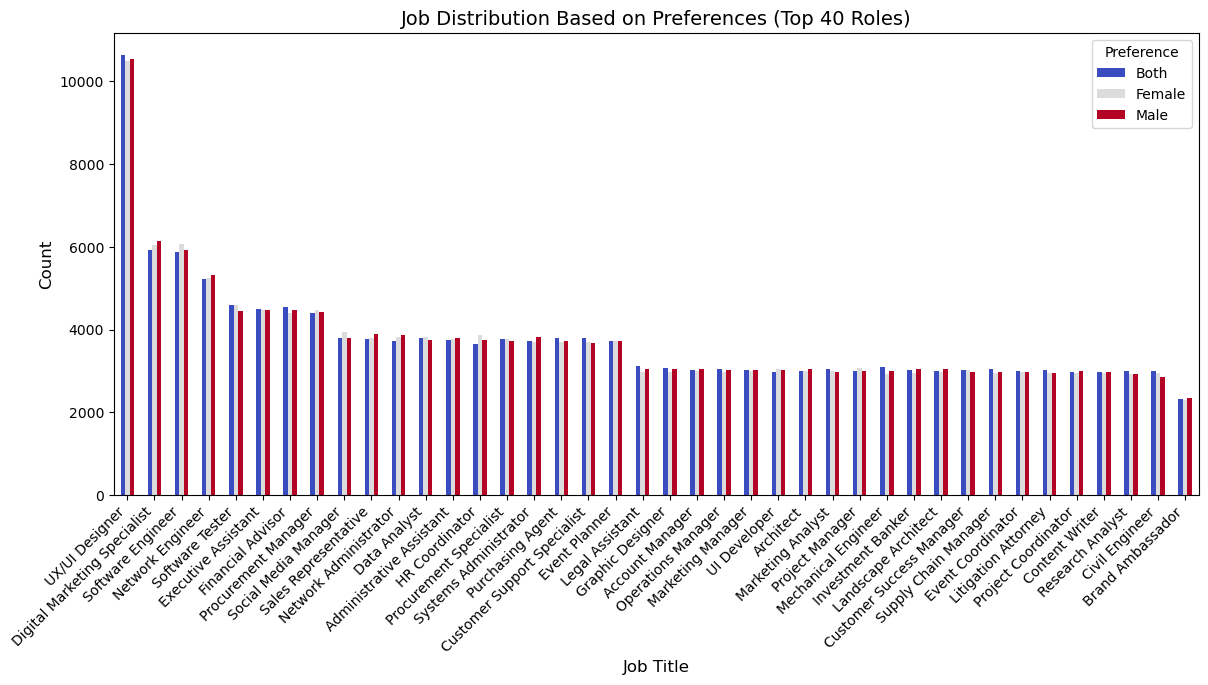

In [19]:
job_preference_counts = df.groupby(["Job Title", "Preference"]).size().unstack().fillna(0)
top_jobs = job_preference_counts.sum(axis=1).nlargest(40).index
filtered_data = job_preference_counts.loc[top_jobs]
filtered_data.plot(kind="bar", figsize=(14, 6), colormap="coolwarm")

plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Job Distribution Based on Preferences (Top 40 Roles)", fontsize=14)
plt.legend(title="Preference")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.show()


### Plot the top 10 companies with the most job titles


In [20]:
# Count the number of job titles for each company
company_job_counts = df['Company'].value_counts()
top_company = company_job_counts.idxmax()
top_count = company_job_counts.max()

print(f"The company with the highest number of job titles is '{top_company}' with {top_count} job titles.")


The company with the highest number of job titles is 'Marsh & McLennan' with 1291 job titles.


C:\Users\rahul\AppData\Local\Temp\ipykernel_33000\2802423927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_job_counts.head(10).index, y=company_job_counts.head(10).values, palette="Blues")


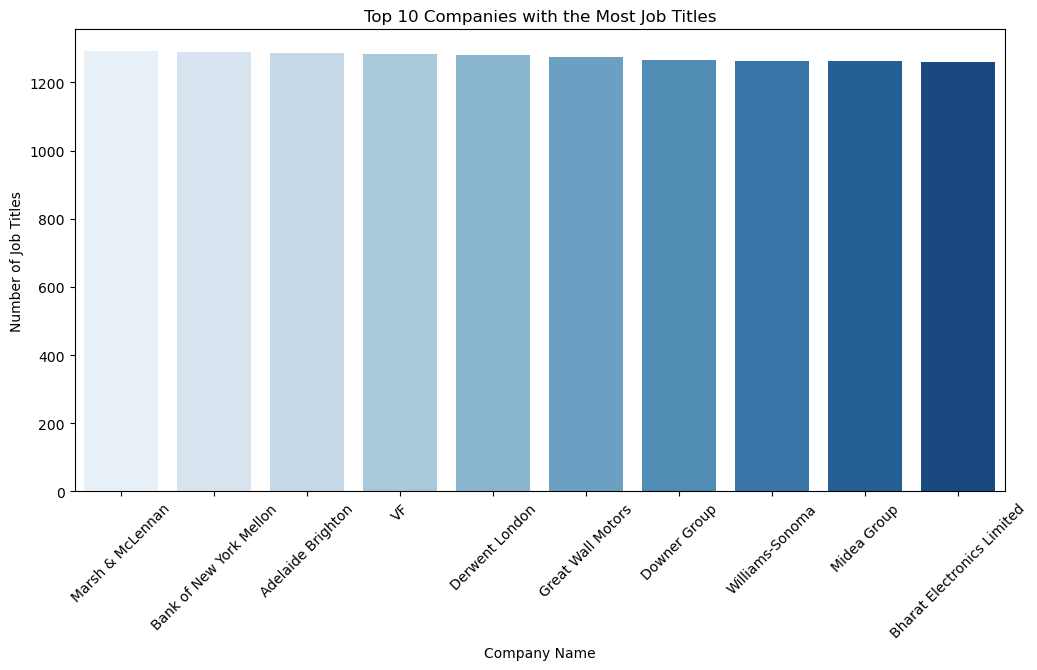

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=company_job_counts.head(10).index, y=company_job_counts.head(10).values, palette="Blues")
plt.xticks(rotation=45)
plt.xlabel("Company Name")
plt.ylabel("Number of Job Titles")
plt.title("Top 10 Companies with the Most Job Titles")
plt.show()


## Word-Cloud for Different Columns

###  Drawing a word cloud for the 'Job Title' column


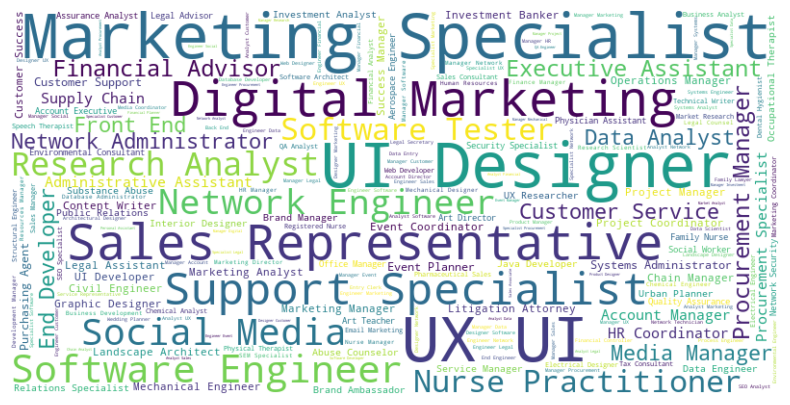

In [22]:
from wordcloud import WordCloud
text = " ".join(job for job in df["Job Title"].dropna())  # Combine all job titles into a single string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()


### Drawing a word cloud for the 'Job Portal' column to see in which portal we got the most number of Job req


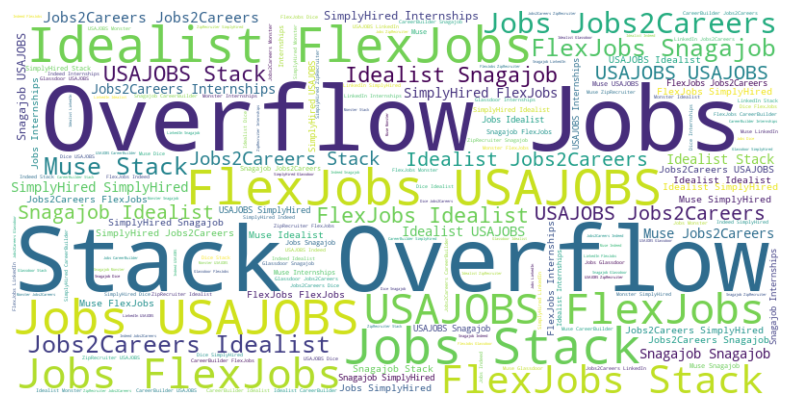

In [23]:
text = " ".join(job for job in df["Job Portal"].dropna())  
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.show()


### Drawing a word cloud for the 'skills' column to see in which skill is req the most


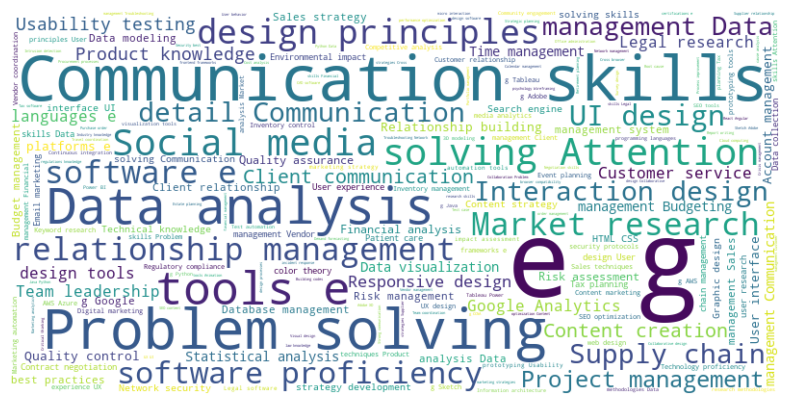

In [24]:
text = " ".join(job for job in df["skills"].dropna())  
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.show()

# Parsing Different Columns

- Parses 'Company Profile' to extract 'Company Sector', 'Industry', 'City', and 'State'.
- Extracts 'Min Salary' and 'Max Salary' to compute 'Avg Salary' (the target variable).
- Parses 'Experience' to create 'Min Experience', 'Max Experience', and 'Avg Experience'.

###  Parse Salary Range (only for target variable, not features)

In [25]:
df[['Min Salary', 'Max Salary']] = df['Salary Range'].str.extract(r'\$(\d+)K-\$(\d+)K')
df[['Min Salary', 'Max Salary']] = df[['Min Salary', 'Max Salary']].astype(float) * 1000
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

### Parse Experience

In [26]:
df[['Min Experience', 'Max Experience']] = df['Experience'].str.extract(r'(\d+)\s*to\s*(\d+)\s*Years')
df[['Min Experience', 'Max Experience']] = df[['Min Experience', 'Max Experience']].astype(float)
df['Avg Experience'] = (df['Min Experience'] + df['Max Experience']) / 2

In [27]:
# Create Seniority Level
df['Seniority Level'] = pd.cut(df['Avg Experience'], bins=[0, 3, 7, 15, 40], labels=["Entry", "Mid", "Senior", "Executive"])

In [28]:
df.head()

,Experience,Qualifications,Salary Range,location,Country,Work Type,Company Size,Preference,Job Title,Role,...,Industry,City,State,Min Salary,Max Salary,Avg Salary,Min Experience,Max Experience,Avg Experience,Seniority Level
Job Id,,,,,,,,,,,,,,,,,,,,,
1397781,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,26801,Female,Digital Marketing Specialist,Social Media Manager,...,Diversified Financials,Sunny Isles Beach,Florida,59000.0,99000.0,79000.0,5.0,15.0,10.0,Senior
1838179,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,100340,Female,Web Developer,Frontend Web Developer,...,Commercial Banks,Pittsburgh,Pennsylvania,56000.0,116000.0,86000.0,2.0,12.0,7.0,Mid
1376362,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,84525,Male,Operations Manager,Quality Control Manager,...,Insurance: Property and Casualty (Stock),San Antonio,Texas,61000.0,104000.0,82500.0,0.0,12.0,6.0,Mid
373737,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,129896,Female,Network Engineer,Wireless Network Engineer,...,"Mining, Crude-Oil Production",New York,New York,65000.0,91000.0,78000.0,4.0,11.0,7.5,Senior
1722112,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,53944,Female,Event Manager,Conference Manager,...,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,64000.0,87000.0,75500.0,1.0,12.0,6.5,Mid


### Average Salary based on 'Work Type' and 'Qualification'

C:\Users\rahul\AppData\Local\Temp\ipykernel_33000\1875461943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Work Type", y="Avg Salary", data=df, palette="coolwarm")


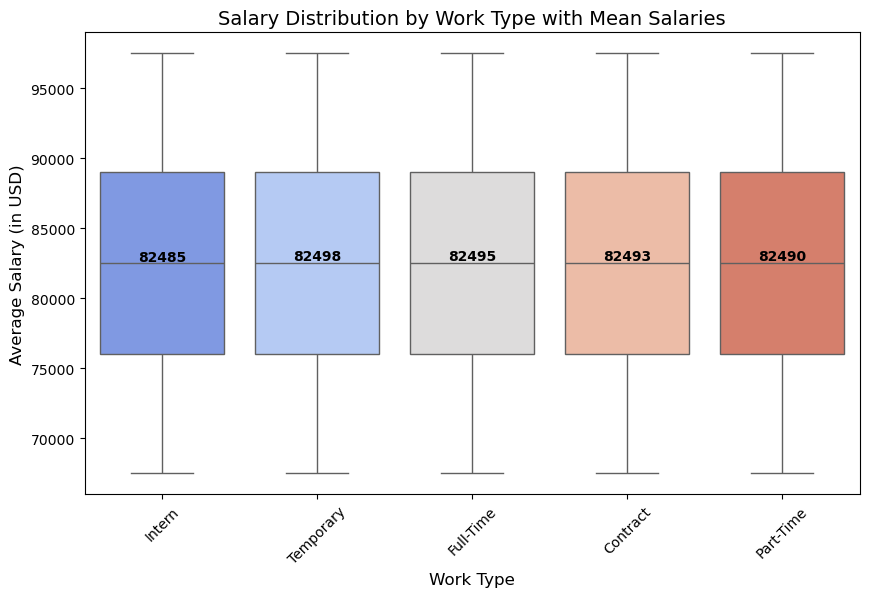

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Work Type", y="Avg Salary", data=df, palette="coolwarm")
means = df.groupby("Work Type")["Avg Salary"].mean()
for i, mean in enumerate(means):
    plt.text(i, mean, f'{mean:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Average Salary (in USD)", fontsize=12)
plt.title("Salary Distribution by Work Type with Mean Salaries", fontsize=14)
plt.xticks(rotation=45)
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_33000\1321799849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Qualifications", y="Avg Salary", data=df, palette="Blues")


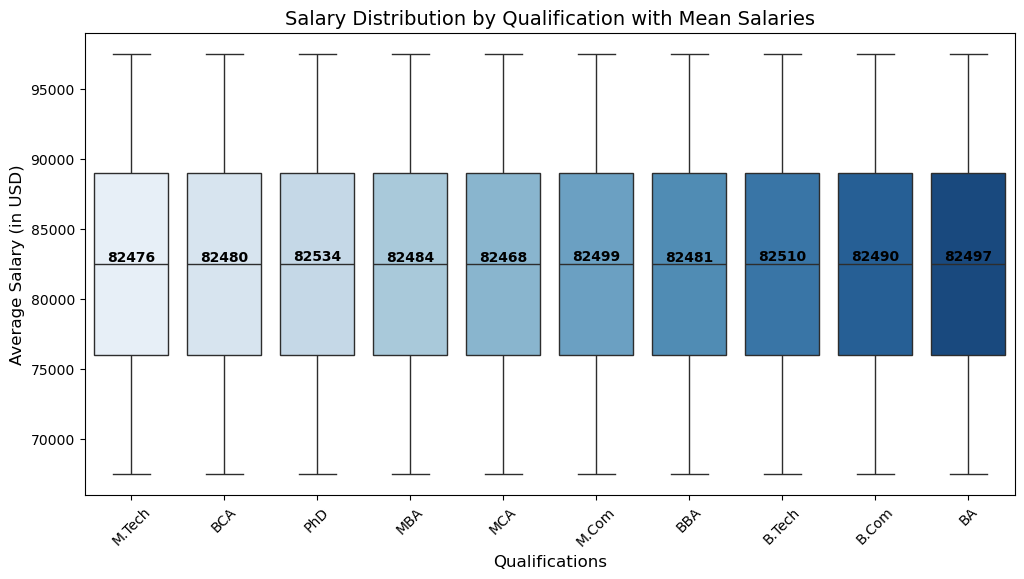

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Qualifications", y="Avg Salary", data=df, palette="Blues")
means = df.groupby("Qualifications")["Avg Salary"].mean()
for i, mean in enumerate(means):
    plt.text(i, mean, f'{mean:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel("Qualifications", fontsize=12)
plt.ylabel("Average Salary (in USD)", fontsize=12)
plt.title("Salary Distribution by Qualification with Mean Salaries", fontsize=14)
plt.xticks(rotation=45)
plt.show()


-The boxplot displays the distribution of average salaries across different sections of 'Work Type' and 'Qualifications'

- The mean salaries are fairly similar across all work types, ranging from $82,480 to $82,500, which is indicated by the bold text labels on each box.

- Despite similar means, there is visible spread (variance) in salaries within each work type, shown by the height of the boxes and whiskers.

- All work types have similar interquartile ranges, with some showing outliers (individual points outside the whiskers).

- The data suggests that employment type does not drastically affect average salary in this dataset — however, other factors may contribute more significantly.

## Co-rrelation Matrix

C:\Users\rahul\AppData\Local\Temp\ipykernel_33000\2701044096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


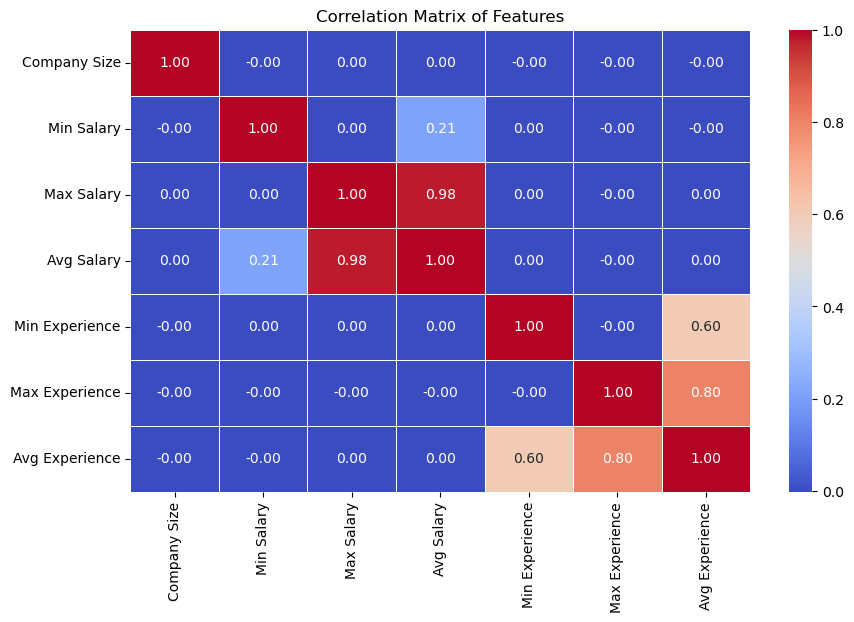

In [31]:
# Plotting heat-map
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


## **Correlation Analysis**
The correlation matrix provides insights into the relationships between different numerical features in the dataset.

### **Key Observations:**

- **Strong Positive Correlations:**
  - `Max Salary` and `Avg Salary` are highly correlated (**0.98**), indicating that higher maximum salaries tend to result in higher average salaries.
  - `Max Experience` and `Avg Experience` show a strong correlation (**0.80**), as expected since average experience is derived from the minimum and maximum values.
  - `Min Experience` and `Avg Experience` also exhibit a moderate-to-strong correlation (**0.60**).

- **Moderate Correlation:**
  - `Min Salary` has a weak-to-moderate correlation with `Avg Salary` (**0.21**), suggesting it has some influence on the average but is not a dominant factor.

- **No or Negligible Correlation:**
  - `Company Size` has **zero or near-zero correlation** with all other numerical features, including salary and experience, implying limited predictive value.
  - Experience variables (`Min`, `Max`, and `Avg`) show negligible linear correlation with salary variables, which may imply a non-linear relationship or influence from other unaccounted factors.

### **Actionable Insights:**
1. **Feature Selection:** Remove one of the highly correlated features such as `Max Salary` or `Avg Salary` to reduce redundancy in modeling.
2. **Non-linear Modeling:** Since salary and experience don't show strong linear relationships, consider using non-linear models (e.g., Random Forest, Gradient Boosting).
3. **Ignore Irrelevant Features:** Features like `Company Size` with no correlation can likely be excluded from the modeling process.
4. **Multicollinearity Handling:** Use techniques like **Variance Inflation Factor (VIF)** to detect and address multicollinearity caused by highly correlated features.


# Feature Engineering

- Creates binary features from 'Job Title' (e.g., 'Is Senior Title', 'Is Manager Title', 'Is Technical Title') to capture salary-related patterns.
- Extracts features from 'Job Description' (e.g., 'Has High Responsibility') and 'skills' (e.g., 'Requires Coding').
- Adds features like 'Requires Advanced Degree', 'Is Remote', and 'Is High Cost City' to capture additional patterns.

### Extract keywords from Job Title

In [32]:
df['Is Senior Title'] = df['Job Title'].str.contains('Senior|Lead|Principal', case=False, na=False).astype(int)
df['Is Manager Title'] = df['Job Title'].str.contains('Manager|Director|Head', case=False, na=False).astype(int)
df['Is Technical Title'] = df['Job Title'].str.contains('Engineer|Developer|Analyst|Scientist', case=False, na=False).astype(int)

### Extract features from Job Description

In [33]:
df['Job Description'] = df['Job Description'].fillna("")
df['Has High Responsibility'] = df['Job Description'].str.contains('responsible|lead|manage', case=False, na=False).astype(int)

### Extract features from skills


In [34]:
df['Requires Coding'] = df['skills'].str.contains('Python|Java|SQL|programming', case=False, na=False).astype(int)

### Extract additional features


In [35]:
df['Requires Advanced Degree'] = df['Qualifications'].str.contains('PhD|Master', case=False, na=False).astype(int)
df['Is Remote'] = df['Work Type'].str.contains('Remote', case=False, na=False).astype(int)
df['Is High Cost City'] = df['City'].isin(['New York', 'San Francisco', 'Boston']).astype(int)

In [36]:
df.head()

,Experience,Qualifications,Salary Range,location,Country,Work Type,Company Size,Preference,Job Title,Role,...,Avg Experience,Seniority Level,Is Senior Title,Is Manager Title,Is Technical Title,Has High Responsibility,Requires Coding,Requires Advanced Degree,Is Remote,Is High Cost City
Job Id,,,,,,,,,,,,,,,,,,,,,
1397781,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,26801,Female,Digital Marketing Specialist,Social Media Manager,...,10.0,Senior,0,0,0,1,0,0,0,0
1838179,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,100340,Female,Web Developer,Frontend Web Developer,...,7.0,Mid,0,0,1,0,1,0,0,0
1376362,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,84525,Male,Operations Manager,Quality Control Manager,...,6.0,Mid,0,1,0,1,0,1,0,0
373737,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,129896,Female,Network Engineer,Wireless Network Engineer,...,7.5,Senior,0,0,1,0,0,1,0,1
1722112,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,53944,Female,Event Manager,Conference Manager,...,6.5,Mid,0,1,0,1,0,0,0,0


### Debuging: Confirm columns after preprocessing


In [37]:
print("Columns after preprocessing:", df.columns)

Columns after preprocessing: Index(['Experience', 'Qualifications', 'Salary Range', 'location', 'Country',
       'Work Type', 'Company Size', 'Preference', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'skills', 'Responsibilities',
       'Company', 'Job Posting Year', 'Company Sector', 'Industry', 'City',
       'State', 'Min Salary', 'Max Salary', 'Avg Salary', 'Min Experience',
       'Max Experience', 'Avg Experience', 'Seniority Level',
       'Is Senior Title', 'Is Manager Title', 'Is Technical Title',
       'Has High Responsibility', 'Requires Coding',
       'Requires Advanced Degree', 'Is Remote', 'Is High Cost City'],
      dtype='object')


## Defining features and Targets

In [38]:
categorical_cols = ['Work Type', 'Qualifications', 'State', 'Company Sector', 'Industry', 'City', 'Seniority Level', 'Job Title', 'Role', 'Job Portal']
numeric_cols = ['Min Experience', 'Max Experience', 'Avg Experience', 'Job Posting Year', 'Is Senior Title', 'Is Manager Title', 'Is Technical Title', 'Has High Responsibility', 'Requires Coding', 'Requires Advanced Degree', 'Is Remote', 'Is High Cost City']
text_cols = ['Job Description']
X = df[categorical_cols + numeric_cols + text_cols]
y = df['Avg Salary']

### Test- Train split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Splits the data into training (80%) and test (20%) sets.
- Standardizes numeric features using StandardScaler.

###  Standardizing numeric features 

In [40]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Target encoding for categorical features with smoothing


In [41]:
target_encoder = TargetEncoder(cols=categorical_cols, smoothing=10.0)
X_train[categorical_cols] = target_encoder.fit_transform(X_train[categorical_cols], y_train)
X_test[categorical_cols] = target_encoder.transform(X_test[categorical_cols])

- Applies TargetEncoder to categorical features with smoothing to reduce overfitting.
- Creates 'Job Cluster' using TF-IDF vectorization and KMeans clustering on 'Job Description'.

## Clustering 'Job description'

In [42]:
X_train['cleaned_desc'] = X_train['Job Description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
X_test['cleaned_desc'] = X_test['Job Description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


- This step preprocesses the 'Job Description' column in both the training (X_train) and test (X_test) sets.

In [43]:
# TF-IDF vectorization

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_train = vectorizer.fit_transform(X_train['cleaned_desc'])
tfidf_test = vectorizer.transform(X_test['cleaned_desc'])

- Converts the cleaned text data ('cleaned_desc') into a numerical format suitable for clustering.

In [44]:
# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
X_train['Job Cluster'] = kmeans.fit_predict(tfidf_train)
X_test['Job Cluster'] = kmeans.predict(tfidf_test)


- Performs clustering on the TF-IDF matrix to group similar job descriptions into clusters.

#### Dropping Un-necessary columns

In [45]:
X_train = X_train.drop(columns=['cleaned_desc', 'Job Description'])
X_test = X_test.drop(columns=['cleaned_desc', 'Job Description'])

- Removes the intermediate 'cleaned_desc' column and the original 'Job Description' column, as they are no longer needed after creating 'Job Cluster'.
- Output: X_train and X_test now contain the 'Job Cluster' feature along with other features, but without the text columns.

In [46]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

- Applies a log transformation to the target variable ('Avg Salary') to reduce skewness and stabilize variance, which can improve model performance (especially for Linear Regression).

### Visualizing the cluster

Saved cluster visualization as 'job_description_clusters_pca.png'


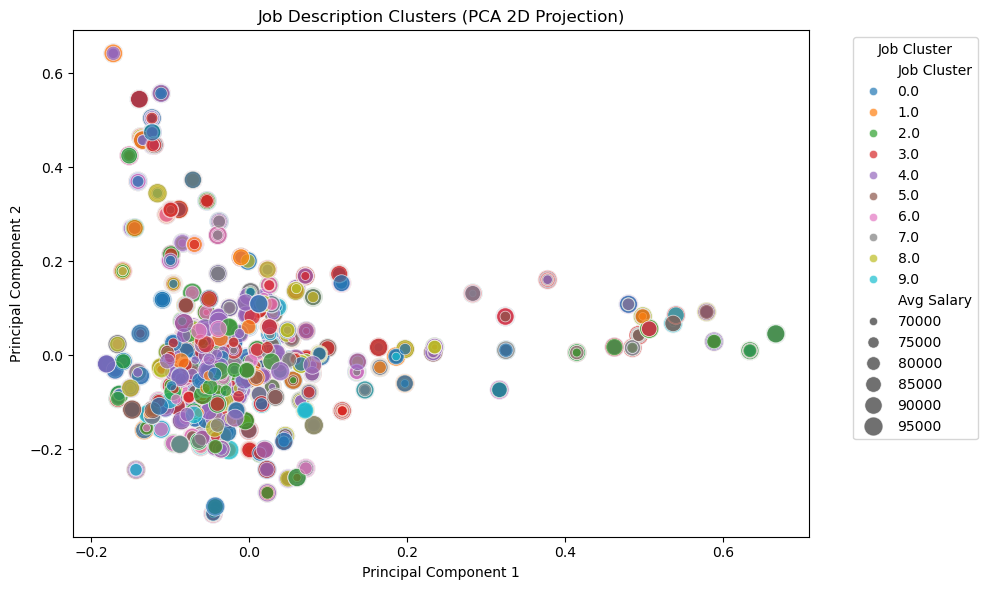

In [47]:
# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce TF-IDF matrix to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
tfidf_train_2d = pca.fit_transform(tfidf_train.toarray())  # Convert sparse matrix to dense for PCA

# Create a DataFrame with the 2D coordinates and cluster labels
cluster_viz_df = pd.DataFrame(tfidf_train_2d, columns=['PC1', 'PC2'])
cluster_viz_df['Job Cluster'] = X_train['Job Cluster']
cluster_viz_df['Avg Salary'] = y_train.values  # Include salary for color coding

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_viz_df, x='PC1', y='PC2', hue='Job Cluster', palette='tab10', size='Avg Salary', sizes=(20, 200), alpha=0.7)
plt.title("Job Description Clusters (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Job Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('job_description_clusters_pca.png')
print("Saved cluster visualization as 'job_description_clusters_pca.png'")

from sklearn.feature_selection import SelectFromModel
print("Performing feature selection...")
selector = SelectFromModel(RandomForestRegressor(n_estimators=50, random_state=42), threshold='median')
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Step 6 (Expanded): Train and evaluate models with additional models and hyperparameter tuning
# Feature selection using Random Forest
from sklearn.feature_selection import SelectFromModel
print("Performing feature selection...")
selector = SelectFromModel(RandomForestRegressor(n_estimators=50, random_state=42), threshold='median')
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

## Log-Transforming the 'target variable'

In [48]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

- This step applies a log transformation to the target variable 'Avg Salary' (stored in y_train and y_test).
- np.log1p(x) computes log(1 + x), which is useful for handling zero or small values and reducing the skewness of the salary distribution.
- Salaries are often right-skewed (many lower salaries, a few very high salaries), and log transformation makes the distribution more normal, which can improve the performance of models like Linear Regression that assume normality in the target variable.

## Linear- Regression Training

In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)
lr_pred_log = lr_model.predict(X_test)
lr_pred = np.expm1(lr_pred_log)  # Convert back to original scale
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = root_mean_squared_error(y_test, lr_pred)
print("Linear Regression")
print(f"   R² Score: {lr_r2:.4f}")
print(f"   RMSE: {lr_rmse:.2f}\n")

Linear Regression
   R² Score: -0.0032
   RMSE: 7537.00



- Linear Regression is a simple, interpretable model that assumes a linear relationship between the features (X_train) and the target (y_train_log). It’s often used as a baseline model to establish a starting point for performance comparison.
- Training: The model is trained on X_train and y_train_log (log-transformed target), which helps handle the skewness of 'Avg Salary'.
- Prediction: The model predicts on X_test, producing lr_pred_log (predictions in log scale). These are converted back to the original scale using np.expm1 (inverse of log1p) to get lr_pred.

### Cross-validating Linear Regression

In [50]:
cv_scores_lr = cross_val_score(lr_model, X_train, y_train_log, cv=5, scoring='r2')
print(f"R² Scores: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}\n")

R² Scores: 0.0009 ± 0.0001



- R² Score: Measures the proportion of variance in 'Avg Salary' explained by the model (ranges from 0 to 1, higher is better; negative indicates worse performance than predicting the mean).
- RMSE (Root Mean Squared Error): Measures the average prediction error in the original units (USD), with lower values indicating better performance.

## Decision Tree Refression

In [51]:

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = root_mean_squared_error(y_test, dt_pred)
print("Decision Tree Regressor")
print(f"   R² Score: {dt_r2:.4f}")
print(f"   RMSE: {dt_rmse:.2f}\n")

Decision Tree Regressor
   R² Score: -0.0074
   RMSE: 7552.82



- R² Score: -0.0074: A negative R² score means the model performs worse than a baseline that predicts the mean 'Avg Salary' for all samples. An R² of -0.0074 is slightly worse than Linear Regression’s -0.0011, indicating that the Decision Tree is failing to capture meaningful patterns in the data.
- RMSE: 7552.82: The average prediction error is $7552.82, slightly higher than Linear Regression’s $7529.30. This means the Decision Tree’s predictions are, on average, off by $7552.82, which is significant given the salary range in your dataset (likely $50K to $150K).

### Cross-validation for decision tree

In [52]:
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print(f"Decision Tree Cross-Validation R² Scores: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}\n")

Decision Tree Cross-Validation R² Scores: -0.0074 ± 0.0009



In [53]:
dt_train_pred = dt_model.predict(X_train)
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_train_rmse = root_mean_squared_error(y_train, dt_train_pred)
print("Decision Tree Regressor (Training Set)")
print(f"   R² Score: {dt_train_r2:.4f}")
print(f"   RMSE: {dt_train_rmse:.2f}\n")

Decision Tree Regressor (Training Set)
   R² Score: 0.0072
   RMSE: 7502.66



In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree with fewer combinations
print("Tuning Decision Tree hyperparameters (Reduced Grid)...")
dt_param_grid = {
    'max_depth': [5, 15, 30],            
    'min_samples_split': [2, 10],      
    'min_samples_leaf': [1, 5]           
}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='r2', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
dt_model = dt_grid_search.best_estimator_
dt_train_pred = dt_model.predict(X_train)
dt_pred = dt_model.predict(X_test)
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_train_rmse = root_mean_squared_error(y_train, dt_train_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = root_mean_squared_error(y_test, dt_pred)
print("Decision Tree Regressor (Tuned) - Training Set")
print(f"   R² Score: {dt_train_r2:.4f}")
print(f"   RMSE: {dt_train_rmse:.2f}\n")
print("Decision Tree Regressor (Tuned) - Test Set")
print(f"   R² Score: {dt_r2:.4f}")
print(f"   RMSE: {dt_rmse:.2f}\n")

# Cross-validation for tuned Decision Tree
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print(f"Tuned Decision Tree Cross-Validation R² Scores: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}\n")

Tuning Decision Tree hyperparameters (Reduced Grid)...
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Regressor (Tuned) - Training Set
   R² Score: 0.0011
   RMSE: 7525.73

Decision Tree Regressor (Tuned) - Test Set
   R² Score: -0.0011
   RMSE: 7529.23

Tuned Decision Tree Cross-Validation R² Scores: 0.0004 ± 0.0001



- Decision Tree is performing very Bad, so now i would be moving to Random forest


## Random Forest

In [57]:
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Parallelize tree training
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
print("Random Forest Regressor")
print(f"   R² Score: {rf_r2:.4f}")
print(f"   RMSE: {rf_rmse:.2f}\n")


Training Random Forest...
Random Forest Regressor
   R² Score: -0.0270
   RMSE: 7625.99



In [58]:

# Cross-validation for Random Forest with parallelization
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)  # Parallelize folds
print(f"Random Forest Cross-Validation R² Scores: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}\n")

KeyboardInterrupt: 

## Random Forest’s poor performance suggests that the underlying data issues (e.g., noisy features, skewed target) are severe enough to affect even a robust ensemble model.

## The tuned Decision Tree (test R²: -0.0011) used max_depth=5, which was too shallow, leading to underfitting.
- Impact:
- A shallow tree cannot capture the complex, non-linear relationships between features (e.g., 'Job Title', 'Avg Experience') and 'Avg Salary', resulting in poor performance.

## Linear Regression assumes a linear relationship between features and 'Avg Salary', which is unlikely to hold for salary data (e.g., salary often increases non-linearly with experience, and categorical features like 'Job Title' introduce complex patterns).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Function to calculate evaluation metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, use_log_transform=False):
    # If using log transformation, transform the target variable
    if use_log_transform:
        y_train_transformed = np.log1p(y_train)
        y_test_transformed = np.log1p(y_test)
    else:
        y_train_transformed = y_train
        y_test_transformed = y_test

    # Fit the model
    model.fit(X_train, y_train_transformed)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # If using log transformation, convert predictions back to original scale
    if use_log_transform:
        y_train_pred = np.expm1(y_train_pred)
        y_test_pred = np.expm1(y_test_pred)
        y_train = np.expm1(y_train_transformed)
        y_test = np.expm1(y_test_transformed)

    # Calculate metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    # Calculate metrics for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    return {
        'Train R²': train_r2,
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Test R²': test_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test MAPE': test_mape
    }

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=2)  # Reduced n_estimators to avoid memory issues
}

# Evaluate all models and store results
results = []
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    # Evaluate without log transformation
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test, use_log_transform=False)
    metrics['Model'] = model_name + ' (No Log)'
    results.append(metrics)

    # Evaluate with log transformation
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test, use_log_transform=True)
    metrics['Model'] = model_name + ' (With Log)'
    results.append(metrics)

# Create a DataFrame for the evaluation matrix
eval_matrix = pd.DataFrame(results)
eval_matrix = eval_matrix[['Model', 'Train R²', 'Train RMSE', 'Train MAE', 'Train MAPE', 
                           'Test R²', 'Test RMSE', 'Test MAE', 'Test MAPE']]

# Round the values for better readability
eval_matrix = eval_matrix.round(4)

# Display the evaluation matrix
print("\nEvaluation Matrix:")
print(eval_matrix)

# Optionally, save the evaluation matrix to a CSV file
eval_matrix.to_csv('evaluation_matrix.csv', index=False)
print("\nEvaluation matrix saved to 'evaluation_matrix.csv'")

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define evaluation function
def compute_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return r2, rmse, mae, mape

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=2),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=2),
    'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
}

# Log transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train_log)
    train_pred_log = model.predict(X_train)
    test_pred_log = model.predict(X_test)
    train_pred = np.expm1(train_pred_log)
    test_pred = np.expm1(test_pred_log)
    
    # Compute metrics
    train_r2, train_rmse, train_mae, train_mape = compute_metrics(y_train, train_pred)
    test_r2, test_rmse, test_mae, test_mape = compute_metrics(y_test, test_pred)
    
    # Store results
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train MAPE (%)': train_mape,
        'Test R²': test_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test MAPE (%)': test_mape
    })

# Create a DataFrame for the evaluation matrix
eval_matrix = pd.DataFrame(results)
eval_matrix = eval_matrix.round(4)  # Round for readability
print("\nEvaluation Matrix for All Models")
print("=====================================")
print(eval_matrix.to_string(index=False))
print("=====================================\n")